# Import packages

In [143]:
import pandas as pd
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

ImportError: cannot import name 'Layer' from partially initialized module 'tensorflow.python.layers.base' (most likely due to a circular import) (/opt/homebrew/lib/python3.10/site-packages/tensorflow/python/layers/base.py)

# Import data

In [ ]:
data=pd.read_csv("./smoke.csv")

# Columns explanation

#### Air Temperature
#### Air Humidity
#### TVOC: Total Volatile Organic Compounds; measured in parts per billion (Source)
#### eCO2: co2 equivalent concentration; calculated from different values like TVCO
#### Raw H2: raw molecular hydrogen; not compensated (Bias, temperature, etc.)
#### Raw Ethanol: raw ethanol gas (Source)
#### Air Pressure
#### PM 1.0 and PM 2.5: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
#### Fire Alarm: ground truth is "1" if a fire is there
#### CNT: Sample counter
#### UTC: Timestamp UTC seconds
#### NC0.5/NC1.0 and NC2.5: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5)

In [ ]:
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,62630.0,3.131450e+04,18079.868017,0.000000e+00,1.565725e+04,3.131450e+04,4.697175e+04,6.262900e+04
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature[C],62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity[%],62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC[ppb],62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2[ppm],62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure[hPa],62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1.0,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04


In [ ]:
data.corr()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
Unnamed: 0,1.000000,0.551987,0.425636,-0.498121,0.248813,0.160665,-0.232854,0.083094,-0.580829,0.151785,0.128487,0.162053,0.126418,0.100300,-0.053262,-0.361351
UTC,0.551987,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
Temperature[C],0.425636,-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.498121,-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.248813,0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.160665,0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.232854,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,0.083094,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.580829,-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.151785,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552


In [ ]:
data.corr()['Fire Alarm'].sort_values()

UTC              -0.389404
Unnamed: 0       -0.361351
Raw Ethanol      -0.340652
TVOC[ppb]        -0.214743
Temperature[C]   -0.163902
NC0.5            -0.128118
PM1.0            -0.110552
eCO2[ppm]        -0.097006
PM2.5            -0.084916
NC1.0            -0.082828
NC2.5            -0.057707
Raw H2            0.107007
Pressure[hPa]     0.249797
Humidity[%]       0.399846
CNT               0.673762
Fire Alarm        1.000000
Name: Fire Alarm, dtype: float64

<AxesSubplot:>

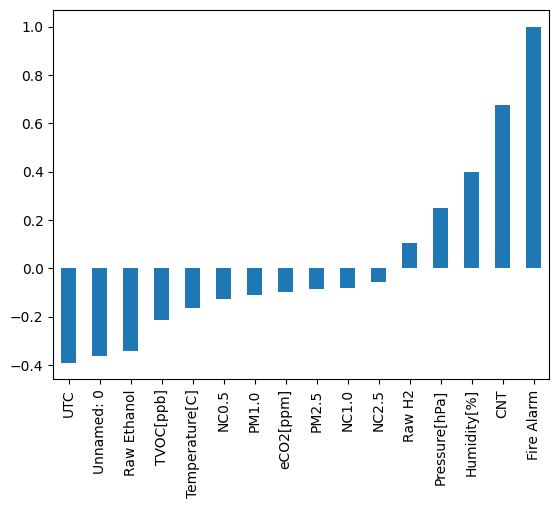

In [ ]:
data.corr()['Fire Alarm'].sort_values().plot(kind='bar')

In [ ]:
cols=['Unnamed: 0' , 'CNT' , 'Raw Ethanol', 'Pressure[hPa]', 'UTC' ,'Humidity[%]' , 'PM1.0', 'PM1.0' , 'NC0.5' ,'NC1.0' ,'NC2.5']

In [ ]:
data.drop(cols, axis=1, inplace=True) 

In [ ]:
data.shape

(62630, 6)

In [ ]:
data["Fire Alarm"].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   TVOC[ppb]       62630 non-null  int64  
 2   eCO2[ppm]       62630 non-null  int64  
 3   Raw H2          62630 non-null  int64  
 4   PM2.5           62630 non-null  float64
 5   Fire Alarm      62630 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.9 MB


# Null values detection

In [ ]:
data.isnull().sum()

Temperature[C]    0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
PM2.5             0
Fire Alarm        0
dtype: int64

# Outliers detection

Temperature[C]       AxesSubplot(0.125,0.798085;0.133621x0.0819149)
TVOC[ppb]         AxesSubplot(0.285345,0.798085;0.133621x0.0819149)
eCO2[ppm]          AxesSubplot(0.44569,0.798085;0.133621x0.0819149)
Raw H2            AxesSubplot(0.606034,0.798085;0.133621x0.0819149)
PM2.5             AxesSubplot(0.766379,0.798085;0.133621x0.0819149)
Fire Alarm           AxesSubplot(0.125,0.699787;0.133621x0.0819149)
dtype: object

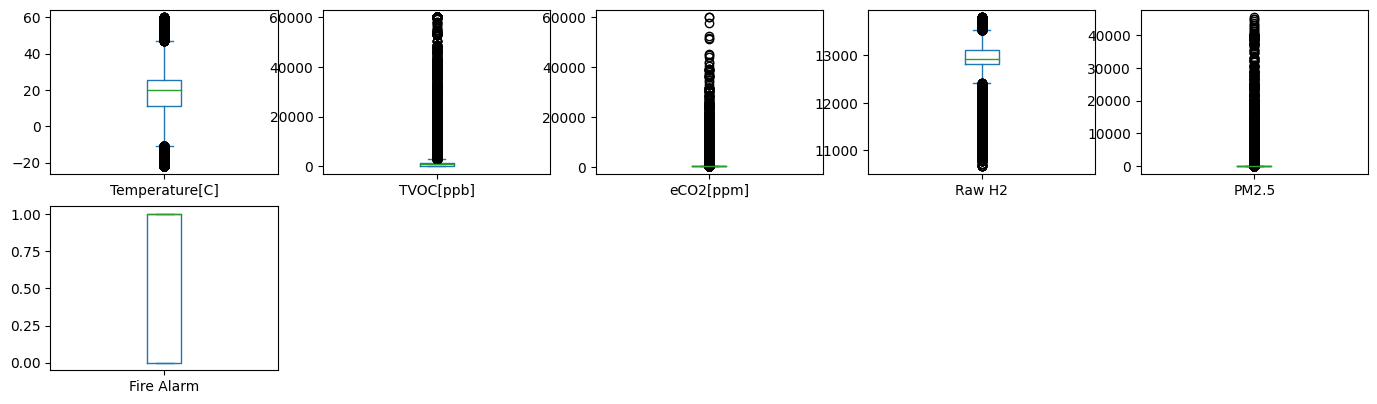

In [ ]:
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

In [ ]:
col = data.columns

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
data_df=data.copy()
df0=data[data['Fire Alarm']==0.0]
df1=data[data['Fire Alarm']==1.0]

In [ ]:
dec={"Colume":[],"outliers":[],"u_range":[] , 'l_range':[] ,"upper":[] , 'lower':[] ,
     "Nu_range":[] , 'Nl_range':[] ,"N_upper":[] , 'N_lower':[] 
    }
for column in data.iloc[:,:-1].columns:
    lr,ur=remove_outlier(df0[column])
    u_data=(data_df[(data_df['Fire Alarm']==0)&(data_df[column] > ur)])[column]
    l_data=(data_df[(data_df['Fire Alarm']==0)&(data_df[column] < lr)])[column]
    dec['Colume'].append(column + " 0")
    dec['outliers'].append(len(u_data)+len(l_data))
    dec['upper'].append(len(u_data))
    dec['lower'].append(len(l_data))
    dec['u_range'].append(ur)
    dec['l_range'].append(lr)
    
    if not u_data.empty:
        u_data=sorted(u_data)
        index=int(round(len(u_data)*0.7,0))
        ur=u_data[index]
        dec['N_upper'].append(len(u_data[index:]))
    else:
        dec['N_upper'].append(len(u_data))
        
    if not l_data.empty:
        l_data=sorted(l_data)
        index=int(round(len(l_data)*0.3,0))
        lr=l_data[index]
        dec['N_lower'].append(len(l_data[:index]))
    else:
        dec['N_lower'].append(len(l_data))
        
    index=(data_df[(data_df['Fire Alarm']==0)&((data_df[column] < lr)|(data_df[column] > ur))]).index
    index=index.to_list()
    
    dec['Nu_range'].append(ur)
    dec['Nl_range'].append(lr)
    
    data_df.drop(index,inplace=True)
    
    lr,ur=remove_outlier(df1[column])
    u_data=(data_df[(data_df['Fire Alarm']==1)&(data_df[column] > ur)])[column]
    l_data=(data_df[(data_df['Fire Alarm']==1)&(data_df[column] < lr)])[column]
    dec['Colume'].append(column + " 1")
    dec['outliers'].append(len(u_data)+len(l_data))
    dec['upper'].append(len(u_data))
    dec['lower'].append(len(l_data))
    dec['u_range'].append(ur)
    dec['l_range'].append(lr)
    
    if not u_data.empty:
        u_data=sorted(u_data)
        index=int(round(len(u_data)*0.7,0))
        ur=u_data[index]
        dec['N_upper'].append(len(u_data[index:]))
    else:
        dec['N_upper'].append(len(u_data))
        
    if not l_data.empty:
        l_data=sorted(l_data)
        index=int(round(len(l_data)*0.3,0))
        lr=l_data[index]
        dec['N_lower'].append(len(l_data[:index]))
    else:
        dec['N_lower'].append(len(l_data))
        
        
    index=(data_df[(data_df['Fire Alarm']==1)&((data_df[column] < lr)|(data_df[column] > ur))]).index
    index=index.to_list()
    
    dec['Nu_range'].append(ur)
    dec['Nl_range'].append(lr)
    
    data_df.drop(index,inplace=True)
    

In [ ]:
data_df.shape

(57505, 6)

# EDA

<AxesSubplot:xlabel='Fire Alarm', ylabel='count'>

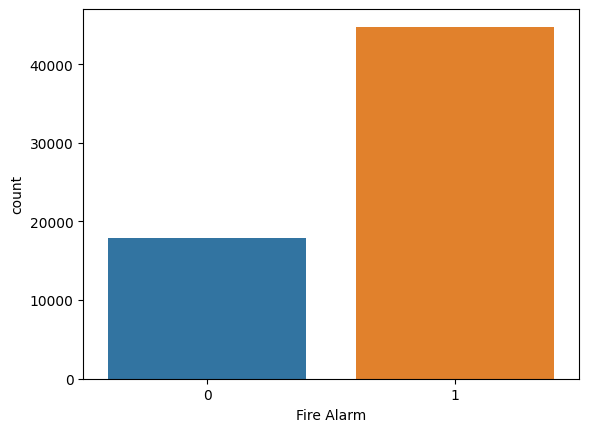

In [ ]:
sns.countplot(x='Fire Alarm',data=data)

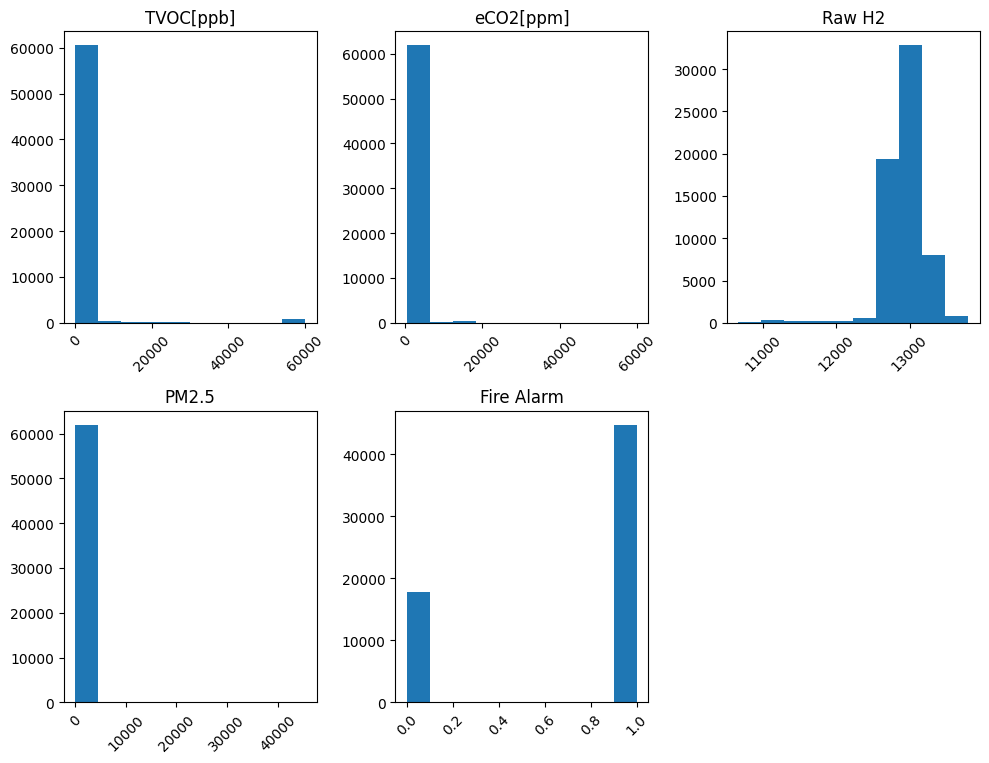

In [ ]:
cols = list(data_df.columns)
cols_df=cols[1:]
plt.figure(figsize=(10,30))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=45)
    plt.hist(data[cols_df[i]])
    
plt.tight_layout()

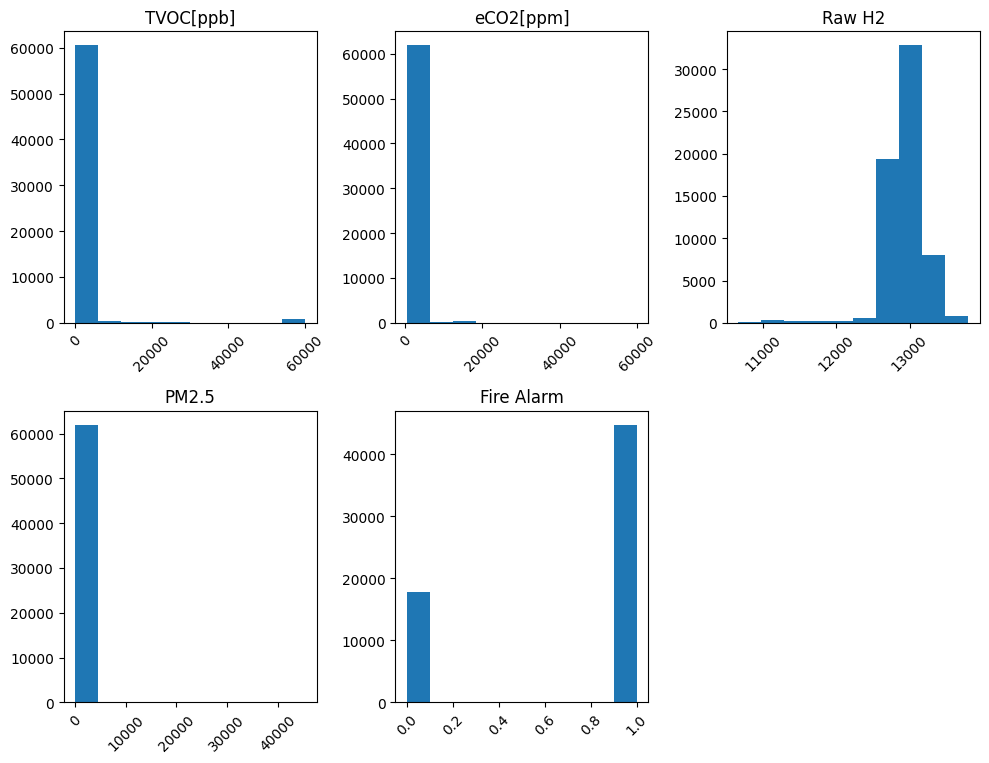

In [ ]:
cols = list(data_df.columns)
cols_df=cols[1:]
plt.figure(figsize=(10,30))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=45)
    plt.hist(data[cols_df[i]])
    
plt.tight_layout()

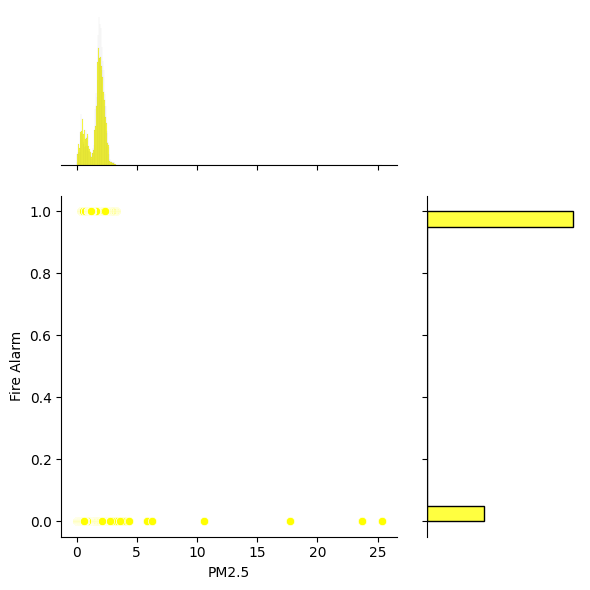

In [ ]:
sns.jointplot(x="PM2.5", y="Fire Alarm",  data=data_df, height=6, ratio=2, color="yellow")

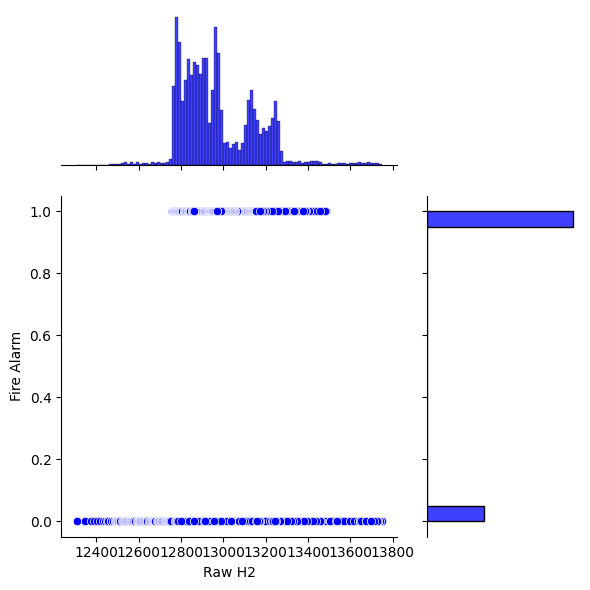

In [ ]:
sns.jointplot(x="Raw H2", y="Fire Alarm",  data=data_df, height=6, ratio=2, color="blue")

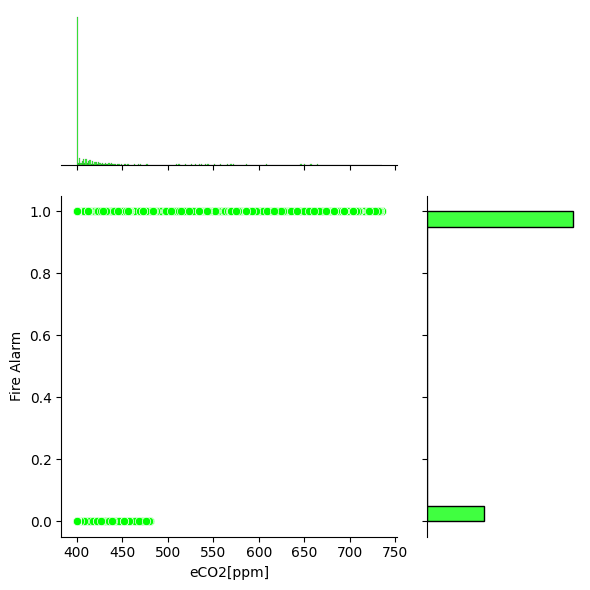

In [ ]:
sns.jointplot(x="eCO2[ppm]", y="Fire Alarm",  data=data_df, height=6, ratio=2, color="lime")
#Temperature[C]

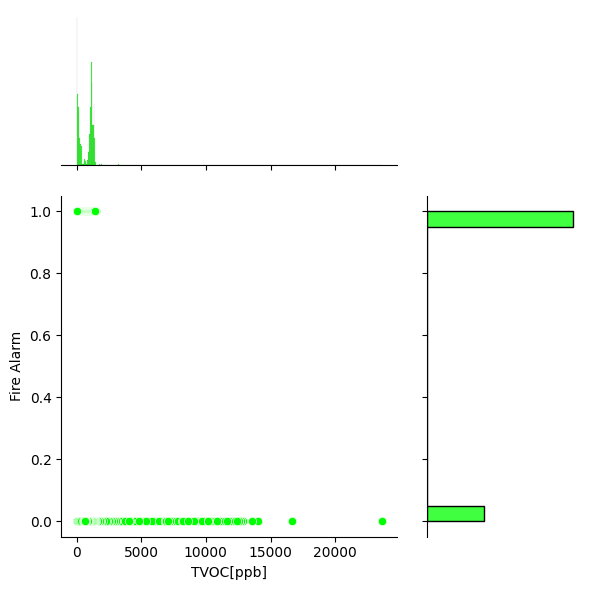

In [ ]:
sns.jointplot(x="TVOC[ppb]", y="Fire Alarm",  data=data_df, height=6, ratio=2, color="lime")

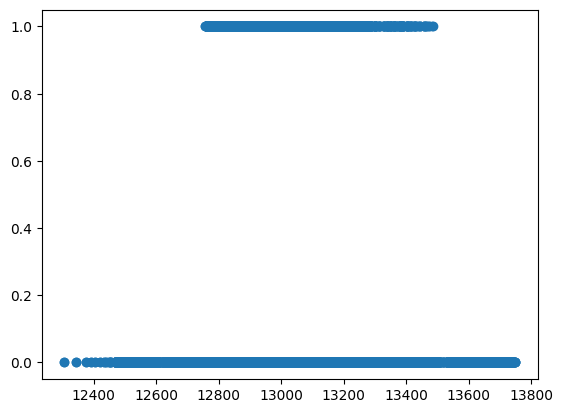

In [ ]:
plt.scatter(data_df["Raw H2"], data_df["Fire Alarm"])

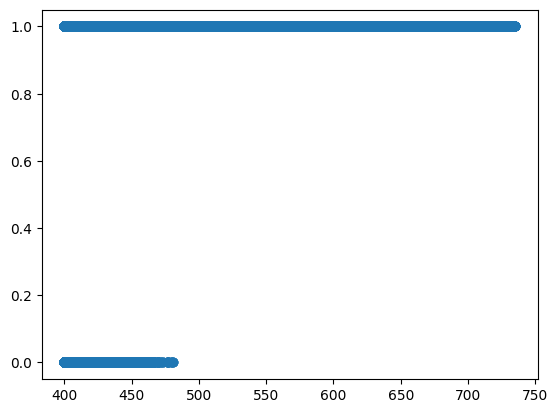

In [ ]:
plt.scatter(data_df["eCO2[ppm]"], data_df["Fire Alarm"])

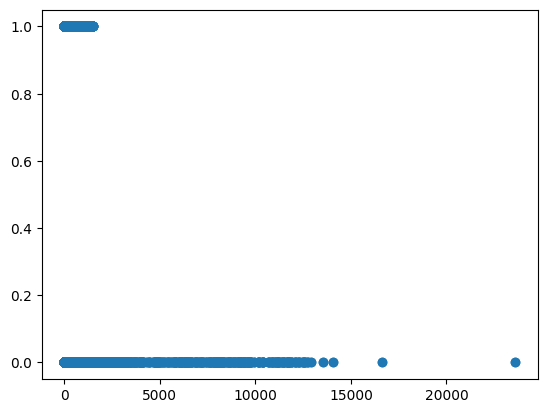

In [ ]:
plt.scatter(data_df["TVOC[ppb]"], data_df["Fire Alarm"])

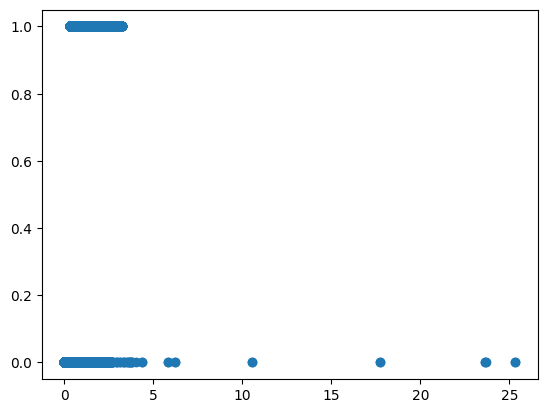

In [ ]:
plt.scatter(data_df["PM2.5"], data_df["Fire Alarm"])

# Split the data

In [ ]:
x = data_df.drop("Fire Alarm", axis = 1).values
y = data_df['Fire Alarm'].values 

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Scale the data

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing Artificial Neural Network


In [ ]:
ann = tf.keras.models.Sequential()

NameError: name 'keras' is not defined

# Creating Hidden Layers

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

# Creating Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

 # Creating Output Layer

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

# Fitting Artificial Neural Network

In [ ]:
history=ann.fit(x=X_train,y=Y_train,validation_data=(X_test,Y_test),batch_size=20,epochs=15)

2022-10-19 14:19:24.164857: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
2301/2301 [==============================] - 5s 2ms/step - loss: 0.2431 - accuracy: 0.9130 - val_loss: 0.1132 - val_accuracy: 0.9402
Epoch 2/15
2301/2301 [==============================] - 4s 2ms/step - loss: 0.0972 - accuracy: 0.9716 - val_loss: 0.0824 - val_accuracy: 0.9739
Epoch 3/15
2301/2301 [==============================] - 4s 2ms/step - loss: 0.0770 - accuracy: 0.9822 - val_loss: 0.0681 - val_accuracy: 0.9810
Epoch 4/15
2301/2301 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9846 - val_loss: 0.0591 - val_accuracy: 0.9791
Epoch 5/15
2301/2301 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9862 - val_loss: 0.0509 - val_accuracy: 0.9836
Epoch 6/15
2301/2301 [==============================] - 4s 2ms/step - loss: 0.0510 - accuracy: 0.9880 - val_loss: 0.0462 - val_accuracy: 0.9903
Epoch 7/15
2301/2301 [==============================] - 4s 2ms/step - loss: 0.0451 - accuracy: 0.9896 - val_loss: 0.0417 - val_accuracy:

In [ ]:
y_pred=ann.predict(X_test)

In [ ]:
y_pred

array([[1.        ],
       [0.99993265],
       [0.2962346 ],
       ...,
       [1.        ],
       [0.9999924 ],
       [0.99791014]], dtype=float32)

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_pred=list(y_pred)

In [ ]:
for i in range(len(y_pred)):
    if y_pred[i] >= .5:
        y_pred[i]=1
    else : y_pred[i]=0

# Evaluate Artificial Neural Network

In [ ]:
ann.evaluate(X_test,Y_test)

360/360 [==============================] - 1s 1ms/step - loss: 0.0301 - accuracy: 0.9923


[0.030144473537802696, 0.9923484921455383]

In [ ]:
history.history

{'loss': [0.24309778213500977,
  0.09723441302776337,
  0.07699643820524216,
  0.06492576748132706,
  0.05687633901834488,
  0.05095677077770233,
  0.04510675370693207,
  0.04129965975880623,
  0.038782138377428055,
  0.03700737655162811,
  0.035608015954494476,
  0.03445173054933548,
  0.03361913189291954,
  0.032974857836961746,
  0.03234211355447769],
 'accuracy': [0.9129858016967773,
  0.9715894460678101,
  0.9822406768798828,
  0.9845883250236511,
  0.9862185716629028,
  0.9880445003509521,
  0.9895878434181213,
  0.990522563457489,
  0.9908703565597534,
  0.9912181496620178,
  0.9915659427642822,
  0.9918919801712036,
  0.9921963214874268,
  0.9920441508293152,
  0.9923702478408813],
 'val_loss': [0.11317571252584457,
  0.08243729174137115,
  0.06813739985227585,
  0.059147849678993225,
  0.05091346800327301,
  0.04616902768611908,
  0.041739217936992645,
  0.03876226022839546,
  0.03589104861021042,
  0.034745000302791595,
  0.033776696771383286,
  0.03245752304792404,
  0.03120

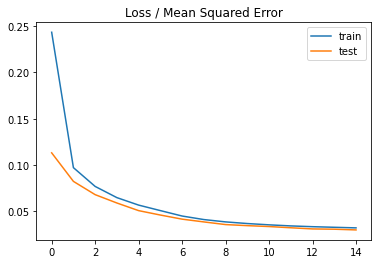

In [ ]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Classification Report

In [ ]:
print(confusion_matrix(Y_test,y_pred))

[[3156   68]
 [  20 8257]]


In [ ]:
print(classification_report(Y_test, y_pred, target_names=["Alarm", "No Alarm"]))

              precision    recall  f1-score   support

       Alarm       0.99      0.98      0.99      3224
    No Alarm       0.99      1.00      0.99      8277

    accuracy                           0.99     11501
   macro avg       0.99      0.99      0.99     11501
weighted avg       0.99      0.99      0.99     11501

